In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [4]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    V1 = Yfuncvec[0] 
    V2 = Yfuncvec[1] 
    
    
    dV1dt = 0.3*V2-0.2*V1
    dV2dt = -V2*0.3
    
    dYfuncvecdt = [dV1dt, dV2dt] 
    return dYfuncvecdt 

In [5]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
V0 = [100, 1000] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[280.0, -300.0]


In [7]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,25) # Range for the independent variable t 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,V0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.08713177,  0.95844948,  3.11265977,  5.51713382,
        8.21586061, 11.16281172, 14.22342357, 17.32908396, 20.45021348,
       23.57615345, 25.        ])
 t_events: None
        y: array([[1.00000000e+02, 1.23848834e+02, 3.08913234e+02, 4.84177299e+02,
        4.55086105e+02, 3.44248871e+02, 2.27029282e+02, 1.38152125e+02,
        8.02706687e+01, 4.53817496e+01, 2.52220461e+01, 1.92265988e+01],
       [1.00000000e+03, 9.74199149e+02, 7.50110532e+02, 3.93079778e+02,
        1.91098478e+02, 8.50669703e+01, 3.51581631e+01, 1.40459617e+01,
        5.53655499e+00, 2.17232125e+00, 8.51109555e-01, 5.55234323e-01]])
 y_events: None


This shows an unrealistic answer since we can not go below zero in the tank.
To find this time we can request the solve_ivp to give us more points and
 - make a plot
 - print out a table of values
 - or we can add in a second differential equation to give the time that V <0.

In [8]:
#makes a smoother line by using more values
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  ])
 t_events: None
        y: arr

Text(0, 0.5, 'Volume ($m^3$)')

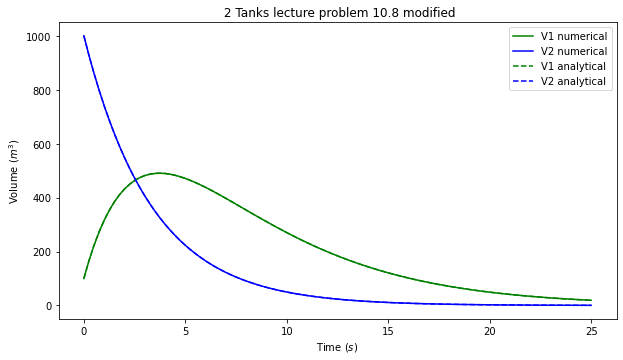

In [9]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'g',label='V1 numerical')
plt.plot(sol.t,sol.y[1],'b',label='V2 numerical')
plt.plot(sol.t,-3000*np.exp(-0.3*sol.t)+3100*np.exp(-0.2*sol.t),'g',linestyle='--',label='V1 analytical')
plt.plot(sol.t,1000*np.exp(-0.3*sol.t),'b',linestyle='--',label='V2 analytical')

#plt.plot([0,80],[0, 0],linestyle=':')#This plots the horizontal line at V=0


plt.legend()
plt.title(' 2 Tanks lecture problem 10.8 modified')
plt.xlabel('Time ($s$)')
plt.ylabel('Volume ($m^3$)')

In [16]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
Vanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t   V (numerical)   V Analytical  ')
print('  (s)   (m^3)         (m^3)     ')

row=0
for row in range(101):
    Vanal[row]=1.2+0.05*sol.t[row]-0.00125*sol.t[row]**2
    print('{:6.2f} {:10.4f}     {:10.4f}  '.format(sol.t[row],sol.y[0,row],Vanal[row] ))



        Summary of Results

   t   V (numerical)   V Analytical  
  (s)   (m^3)         (m^3)     
  0.00     1.2000         1.2000  
  0.80     1.2392         1.2392  
  1.60     1.2768         1.2768  
  2.40     1.3128         1.3128  
  3.20     1.3472         1.3472  
  4.00     1.3800         1.3800  
  4.80     1.4112         1.4112  
  5.60     1.4408         1.4408  
  6.40     1.4688         1.4688  
  7.20     1.4952         1.4952  
  8.00     1.5200         1.5200  
  8.80     1.5432         1.5432  
  9.60     1.5648         1.5648  
 10.40     1.5848         1.5848  
 11.20     1.6032         1.6032  
 12.00     1.6200         1.6200  
 12.80     1.6352         1.6352  
 13.60     1.6488         1.6488  
 14.40     1.6608         1.6608  
 15.20     1.6712         1.6712  
 16.00     1.6800         1.6800  
 16.80     1.6872         1.6872  
 17.60     1.6928         1.6928  
 18.40     1.6968         1.6968  
 19.20     1.6992         1.6992  
 20.00     1.7000         

In [17]:
#Function to find t at V<0
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    V = Yfuncvec[0] 
    draintime = Yfuncvec[1]
    dVdt = 0.05-0.0025*t 
#This if statement will count each second that the Volume is greater than zero
    if V<=0:
        ddraintimedt=0
    else:
        ddraintimedt=1#
     
    dYfuncvecdt = [dVdt,ddraintimedt] 
    return dYfuncvecdt 

In [18]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
V0 = [1.2,0] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[0.05, 1]


In [19]:
#makes a smoother line by using more values
tspan=(0,80)
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval,rtol=1e-8)#We needed to add an relative tolerance (rtol) to get a precise answer
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 380
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
        8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
       17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
       26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
       35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. , 40.8, 41.6, 42.4, 43.2,
       44. , 44.8, 45.6, 46.4, 47.2, 48. , 48.8, 49.6, 50.4, 51.2, 52. ,
       52.8, 53.6, 54.4, 55.2, 56. , 56.8, 57.6, 58.4, 59.2, 60. , 60.8,
       61.6, 62.4, 63.2, 64. , 64.8, 65.6, 66.4, 67.2, 68. , 68.8, 69.6,
       70.4, 71.2, 72. , 72.8, 73.6, 74.4, 75.2, 76. , 76.8, 77.6, 78.4,
       79.2, 80. ])
 t_events: None
        y: array([[ 1.20000000e+00,  1.23920000e+00,  1.27680000e+00,
         1.31280000e+00,  1.34720000e+00,  1.38000000e+00,

In [88]:
print('The drain time is',sol.y[1][-1],'s')

The drain time is 56.87825570239642 s


In [89]:
print('The drain time is{:6.2f}s'  .format(sol.y[1][-1]))


The drain time is 56.88s


We can have python find a numerical solution to the $$V=1.2m^3+0.05\frac{m^3}{s}t-(0.00125\frac{m^3}{s^2})t^2$$

In [24]:
from scipy.optimize import fsolve
def root(t):
    fv=1.2+0.05*t-0.00125*t**2 #solving the equation for zero
    return fv
tGuess = [50]

draintime=fsolve(root,tGuess)
print(draintime)
fv=root(draintime)#fv was not defined outside of the function so I define it here
print(fv) #This will give the fx values near zero

[56.87817783]
[8.8817842e-16]


Or we could simply use the quadratic equation
$$\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

In [23]:
draintime=(-0.05-(0.05**2-4*(-0.00125)*1.2)**0.5)/2/(-0.00125)
print('The drain time is {:6.3f}s'  .format((-0.05-(0.05**2-4*(-0.00125)*1.2)**0.5)/2/(-0.00125)))

The drain time is 56.878s
